In [7]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

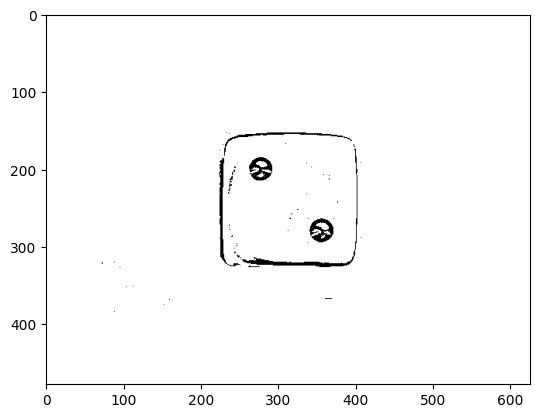

In [8]:
img_org = cv.imread('0.jpg', 0)
clahe = cv.createCLAHE(4, (2,2))
img = clahe.apply(img_org)

img = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 15, 6)

height, width = img.shape

plt.imshow(img, 'gray')

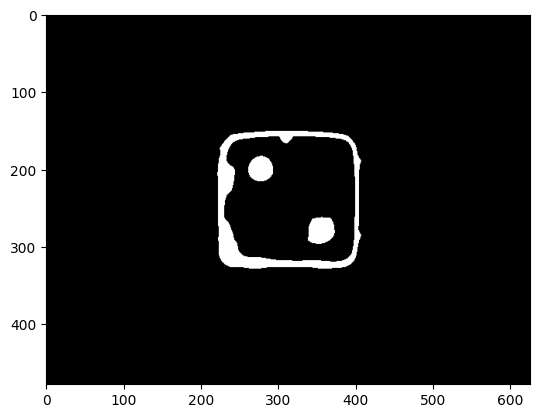

In [9]:
img = 255 - img

img = cv.dilate(img, np.ones((9,9)), iterations=1)

for i in range(7,height-7):
    for j in range(7, width-7):
        zone = img[i-7:i+8, j-7:j+8]
        img[i][j]= int(np.median(zone))
# img = cv.morphologyEx(img, cv.MORPH_CLOSE, np.ones((7,7)))
img = cv.erode(img, np.ones((5,5)), iterations=1)

plt.imshow(img, 'gray')

In [10]:
contours, hierarchy = cv.findContours(img, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

2


True

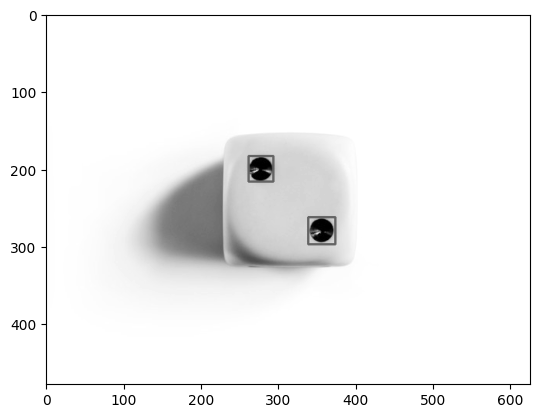

In [11]:
trash = img.copy()
number = 0
for contour, hie in zip(contours, hierarchy[0]):
    if hie[2] == -1:
        number+=1
        x, y, w, h = cv.boundingRect(contour)
        cv.rectangle(img_org, (x,y), (x+w, y+h), (100,100,100), 2)
print(number)
plt.imshow(img_org, 'gray')
cv.imwrite('trash.jpg', img_org)